# Predicting Weekly Sales —— ADJUSTMENT

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import os

# 1 Read the files and merge them in the right way

In [ ]:
#Reading
os.chdir('/Users/cai/Desktop/machine learning data')
train = pd.read_csv("train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
test = pd.read_csv("test.csv", names=['Store','Dept','Date','isHoliday'], sep=',', header=0)
features = pd.read_csv("features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv("stores.csv", names=['Store','Type','Size'],sep=',', header=0)

#Merging
train = train.merge(stores, how='left').merge(features, how='left')#teach algo
test = test.merge(stores, how='left').merge(features, how='left')#test the outcome of the algo

#displaying the read+merge
train.head(10)

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808


# 2 Adjustmen on test data

Trun some str into binary varibels and fill all the NA with 0, and also other adjustment

In [ ]:
#loading type to train data
train = pd.get_dummies(train, columns=["Type"]) #Convert categorical variable into dummy/indicator variables.

#filling markdown n/a with 0
train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

#converting all the dates to just month
train['Month'] = pd.to_datetime(train['Date']).dt.month

Since we don't know about the relationship between CPI, Fuel_Price and Unemployment, we remain them this time; We kick off Data, which has been adjusted, and Markdown 3, which contains too many NA

In [ ]:
train = train.drop(columns=["Date", 'MarkDown3'])
train.head(10)

,Store,Dept,weeklySales,isHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month
0,1,1,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2
1,1,1,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,2
2,1,1,41595.55,False,151315,39.93,2.514,0.0,0.0,0.0,0.0,211.289143,8.106,1,0,0,2
3,1,1,19403.54,False,151315,46.63,2.561,0.0,0.0,0.0,0.0,211.319643,8.106,1,0,0,2
4,1,1,21827.90,False,151315,46.50,2.625,0.0,0.0,0.0,0.0,211.350143,8.106,1,0,0,3
5,1,1,21043.39,False,151315,57.79,2.667,0.0,0.0,0.0,0.0,211.380643,8.106,1,0,0,3
6,1,1,22136.64,False,151315,54.58,2.720,0.0,0.0,0.0,0.0,211.215635,8.106,1,0,0,3
7,1,1,26229.21,False,151315,51.45,2.732,0.0,0.0,0.0,0.0,211.018042,8.106,1,0,0,3
8,1,1,57258.43,False,151315,62.27,2.719,0.0,0.0,0.0,0.0,210.820450,7.808,1,0,0,4
9,1,1,42960.91,False,151315,65.86,2.770,0.0,0.0,0.0,0.0,210.622857,7.808,1,0,0,4


We need to transfer Store, Dept and Month into categorical varibles, avoding the continous bias.

In [ ]:
train1 = train
train1['Dept'] = train['Dept'].apply(str)
train1['Store'] = train['Store'].apply(str)
train1['Month'] = train['Month'].apply(str)
train = train1
train

,Store,Dept,weeklySales,isHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month
0,1,1,24924.50,False,151315,42.31,2.572,0.00,0.00,0.00,0.00,211.096358,8.106,1,0,0,2
1,1,1,46039.49,True,151315,38.51,2.548,0.00,0.00,0.00,0.00,211.242170,8.106,1,0,0,2
2,1,1,41595.55,False,151315,39.93,2.514,0.00,0.00,0.00,0.00,211.289143,8.106,1,0,0,2
3,1,1,19403.54,False,151315,46.63,2.561,0.00,0.00,0.00,0.00,211.319643,8.106,1,0,0,2
4,1,1,21827.90,False,151315,46.50,2.625,0.00,0.00,0.00,0.00,211.350143,8.106,1,0,0,3
5,1,1,21043.39,False,151315,57.79,2.667,0.00,0.00,0.00,0.00,211.380643,8.106,1,0,0,3
6,1,1,22136.64,False,151315,54.58,2.720,0.00,0.00,0.00,0.00,211.215635,8.106,1,0,0,3
7,1,1,26229.21,False,151315,51.45,2.732,0.00,0.00,0.00,0.00,211.018042,8.106,1,0,0,3
8,1,1,57258.43,False,151315,62.27,2.719,0.00,0.00,0.00,0.00,210.820450,7.808,1,0,0,4
9,1,1,42960.91,False,151315,65.86,2.770,0.00,0.00,0.00,0.00,210.622857,7.808,1,0,0,4


Then we dummy them

In [ ]:
train1 = train
train1 = pd.get_dummies(train1, columns=["Store"])
train1 = pd.get_dummies(train1, columns=["Dept"])
train1 = pd.get_dummies(train1, columns=["Month"])
train1.describe()
# train1 is just as what we had expected

,weeklySales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown4,MarkDown5,CPI,Unemployment,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,...,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,1083.132268,1662.772385,171.201947,7.960289,...,0.056012,0.070693,0.084271,0.091209,0.098043,0.083768,0.090464,0.097208,0.090540,0.090943
std,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,3894.529945,4207.629321,39.159276,1.863296,...,0.229945,0.256311,0.277794,0.287907,0.297373,0.277040,0.286846,0.296241,0.286954,0.287529
min,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,0.000000,0.000000,126.064000,3.879000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,425.290000,2168.040000,212.416993,8.572000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,67474.850000,108519.280000,227.232807,14.313000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train = train1
train.head()

,weeklySales,isHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown4,MarkDown5,CPI,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,...,0,0,1,0,0,0,0,0,0,0
1,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,211.242170,...,0,0,1,0,0,0,0,0,0,0
2,41595.55,False,151315,39.93,2.514,0.0,0.0,0.0,0.0,211.289143,...,0,0,1,0,0,0,0,0,0,0
3,19403.54,False,151315,46.63,2.561,0.0,0.0,0.0,0.0,211.319643,...,0,0,1,0,0,0,0,0,0,0
4,21827.90,False,151315,46.50,2.625,0.0,0.0,0.0,0.0,211.350143,...,0,0,0,1,0,0,0,0,0,0


# 2 Algorithm

In [ ]:
#k nearest neighbour
def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=50,max_features='auto', verbose=1, n_jobs=1)
    return clf

#k nearest neighbour
def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

#neural ntwk
def nn():
    clf = MLPRegressor(hidden_layer_sizes=(100,),  activation='relu', verbose=3)
    return clf

# 3 Training Process

In [ ]:
#Split the data
from sklearn.model_selection import train_test_split

def split_data():
    # split the train data into train and test set, which will be used in model evaluation;
    train_train_x, train_test_x, train_train_y, train_test_y = train_test_split(
    train.drop(columns=['weeklySales']),
    train[['weeklySales']], test_size=0.20, random_state=2019)
    return train_train_x, train_test_x, train_train_y, train_test_y

train_train_x, train_test_x, train_train_y, train_test_y = split_data()

In [ ]:
#Have tha model trained and evaluate the model
def evaluate_predict_(m, train_test_x):
    return pd.Series(m.predict(train_test_x))#it runs series row by row... for all the rows... predict weekly sales or each and every row

def evaluate_model_():# we have to select the model to run. Maybe make case statement?
    return extraTreesRegressor()
#    return nn()
#    return randomForestRegressor()

#training
def evaluate_train_(train_x, train_y):
    m = evaluate_model_()# we choose which model to run, based on the model_ function
    m.fit(train_train_x, train_train_y)#aestheitic fit
    return m

def evaluate_train_and_predict(train_x, train_y, test_x):
    m = evaluate_train_(train_x, train_y)
    return evaluate_predict_(m, train_test_x), m

evaluate_predicted_train, m = evaluate_train_and_predict(train_train_x, train_train_y, train_test_x)

/Users/cai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.3s finished


In [ ]:
yvalue = np.array(train_test_y)
np.std(yvalue,ddof=1)

22682.243643040136

In [ ]:
#evaluation
target = yvalue
prediction = np.array(evaluate_predicted_train)
error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])

squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) #(target-prediction)**2
    absError.append(abs(val)) #abs|err|

print("MSE = ", sum(squaredError) / len(squaredError)) #MSE

from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError))) #RMSE
print("MAE = ", sum(absError) / len(absError)) #MAE

MSE =  [16479656.86966987]
RMSE =  4059.514363771838
MAE =  [1625.55656892]


In [ ]:
print("RMSE/STD = ", (sqrt(sum(squaredError) / len(squaredError)))/np.std(yvalue,ddof=1))

RMSE/STD =  0.17897322803061713


In [ ]:
#R_squared
from sklearn.metrics import r2_score
r2_score(target,prediction)

0.9679682037375358

####################################

Evaluation Vector : (RMSE, RMSE/STD, R**2)

RandomForest: (5398, 0.238, 0.943)

Neural Network: (11808, 0.521, 0.729)

extraTreeRegression: (4059, 0.179, 9.968)

* extraTreeRegression still turns out to be the best

####################################

However, compared to the model we applied before, which did change the change the store and dept into categorical variables, all the model have a better performance, especailly RandomForest. That is to say, the continuous bias is really unable to ignore in that case. The adjustment really mean a lot in this project.

# 4 Features of importance

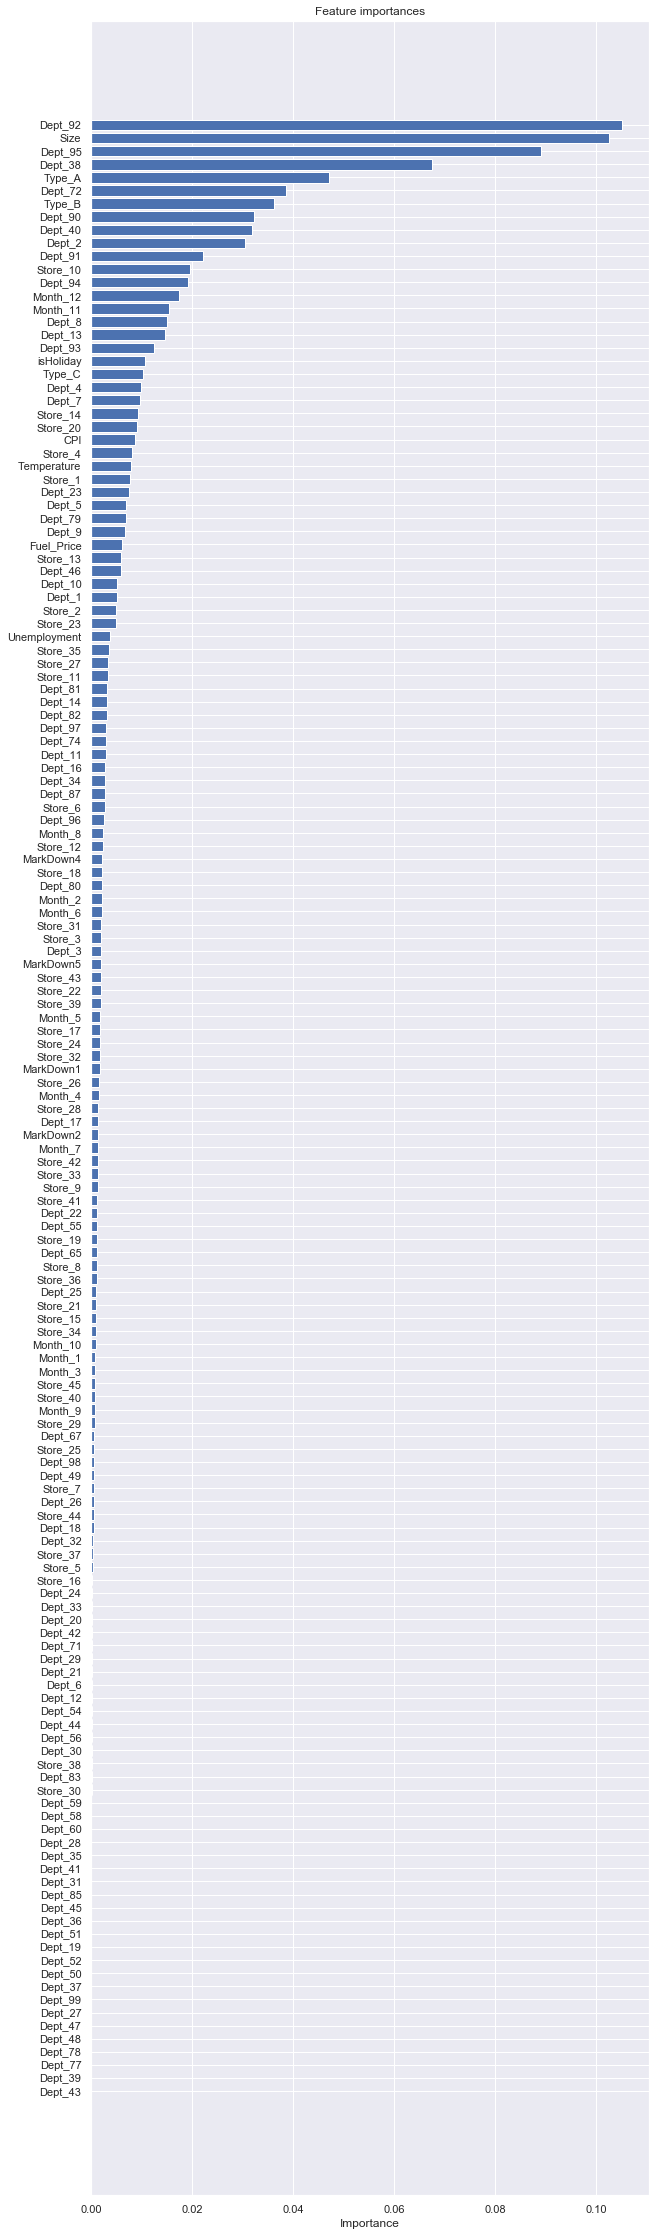

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

features_list = train_train_x.columns.values
feature_importance = m.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10,40))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

####################################

Again, it is not surprised to see that, the Dept, Store and Size speak a lot in deciding the sales performance of the customers. Especially Dept_92, Dept_38 and Dept_95 have a really significate relationship with performance. That is somewhat in accordance with the former result.

Noted that Fuel Price, CPI and Unemployment are really not so that significate, as we had expected before.

With a higher R squared and lower RMSE/STD, our model is better than before.